In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Data Formatting and Visualization

In [2]:
#Reading and formatting data
f = open("hw4-image.txt",'r')
pixels = [p.split() for p in f.readlines()]

for i in range(len(pixels)):
    for j in range(len(pixels[i])):
        pixels[i][j] = float(pixels[i][j])
        
X = np.array(pixels)
b = np.hstack((X, np.zeros((X.shape[0], 1), dtype=X.dtype)))

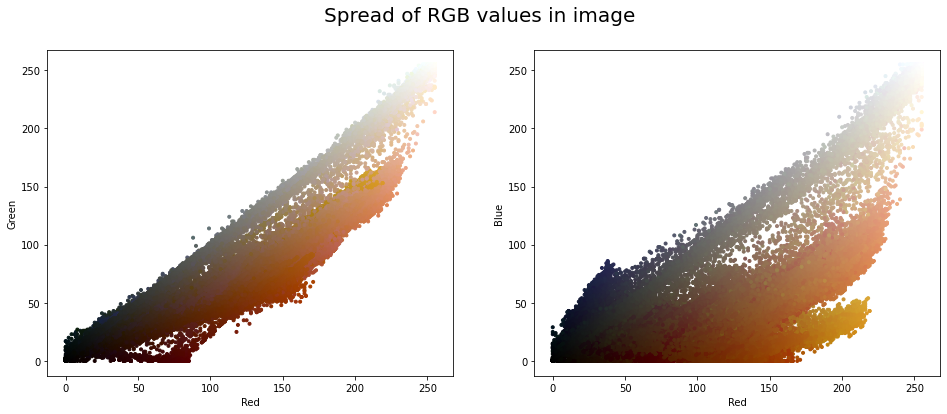

In [4]:
#2D plot of data
data = X
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(data[:,0], data[:,1], c=data/255.0, marker='.')
ax[0].set(xlabel='Red', ylabel='Green')

ax[1].scatter(data[:,0], data[:,2], c=data/255.0, marker='.')
ax[1].set(xlabel='Red', ylabel='Blue')

fig.suptitle('Spread of RGB values in image', size=20);

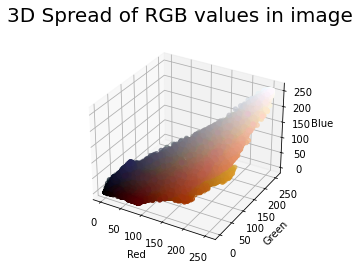

In [6]:
#3D plot of data
data = X
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c = data/255.0)
ax.set(xlabel='Red', ylabel='Green', zlabel='Blue')
fig.suptitle('3D Spread of RGB values in image', size=20);
plt.show()

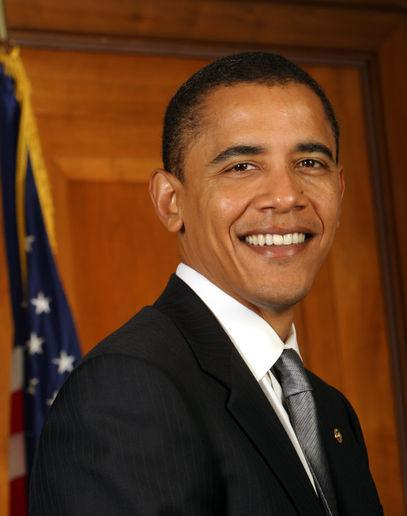

In [19]:
from PIL import Image
from IPython.display import Image as Im
import numpy as np

#Draw picture
w, h = 407, 516
data = np.zeros((h, w, 3), dtype=np.uint8)
k=0
for i in range(516):
    for j in range(407):
        data[i,j] = X[k]
        k+=1
img = Image.fromarray(data, 'RGB')
img.save('obama.jpg')
Im(filename='obama.jpg')

# K-Means

In [20]:
import math

def distance(samplePoint,centroid):
    if math.isnan(centroid[0]) or math.isnan(samplePoint[0]):
        return 999999
    d = np.linalg.norm(samplePoint-centroid)
    return d

def distance2(samplePoint,centroid):
    if math.isnan(centroid[0]) or math.isnan(samplePoint[0]):
        return 0
    d = np.linalg.norm(samplePoint-centroid)
    return d



def k_means(data, k, centroids):

    while(True):
        # Create clusters
        clusters = [[] for _ in range(k)]
        for index, sample in enumerate(data):
            distances = [distance(sample[:3],point) for point in centroids]
            centroid_index = np.argmin(distances)
            clusters[centroid_index].append(sample[:3])
            sample[3] = centroid_index
      
        #Update centroids and set new means
        centroids_old = centroids 
        centroids = np.zeros((k,3))
        for cluster_index, cluster in enumerate(clusters):
            cluster_mean = np.mean(cluster,axis = 0)
            centroids[cluster_index] = cluster_mean

        #check for converggence
        distances = [distance2(centroids_old[i], centroids[i]) for i in range(k)]
        print("Sum of squared distances: ", sum(distances))
        if sum(distances) == 0:
            break

    return data,clusters, centroids

In [21]:
#define centroids
centroids = np.array([[255,255,255],[255,0,0],[128,0,0],[0,255,0],[0,128,0],[0,0,255],[0,0,128],[0,0,0]])
centroids = centroids.astype(float)
imageData,clusters,centroids = k_means(b,8, centroids)


Sum of squared distances:  584.3934115505735
Sum of squared distances:  117.51168063400033
Sum of squared distances:  39.481333215449816
Sum of squared distances:  31.25395519176218
Sum of squared distances:  24.36579427689109
Sum of squared distances:  9.62996240415135
Sum of squared distances:  4.073604717213502
Sum of squared distances:  2.664402740290354
Sum of squared distances:  2.2025351932556445
Sum of squared distances:  1.907844299757691
Sum of squared distances:  1.36013623690362
Sum of squared distances:  1.5615565066496386
Sum of squared distances:  1.3757889106393664
Sum of squared distances:  1.6245323537029832
Sum of squared distances:  1.3966688303804318
Sum of squared distances:  1.4202858744153808
Sum of squared distances:  1.330486678478381
Sum of squared distances:  1.5311922085974512
Sum of squared distances:  1.5860071405298053
Sum of squared distances:  2.0274400796269814
Sum of squared distances:  3.0146205001296456
Sum of squared distances:  4.873555991175131


# Results

In [52]:
#2D plot of cluster data 
print("CLUSTER INFO: CENTROID VALUE AND REMAINING CLUSTERS\n")
for index,centroid in enumerate(centroids):
    print("Cluster ", index, " " , centroid, " # of pixels: ", len(clusters[index]) )
    
    


CLUSTER INFO: CENTROID VALUE AND REMAINING CLUSTERS

Cluster  0   [241.2296146  238.62515213 233.86288032]  # of pixels:  4930
Cluster  1   [194.41158657 136.33311389  90.94364714]  # of pixels:  15190
Cluster  2   [136.2655563   61.08973066  10.10385457]  # of pixels:  52535
Cluster  3   [nan nan nan]  # of pixels:  0
Cluster  4   [157.29173273  97.59397508  51.43329558]  # of pixels:  22075
Cluster  5   [nan nan nan]  # of pixels:  0
Cluster  6   [78.92743714 37.10828688 13.07070482]  # of pixels:  40365
Cluster  7   [25.97800232 23.23575423 23.60599063]  # of pixels:  74917


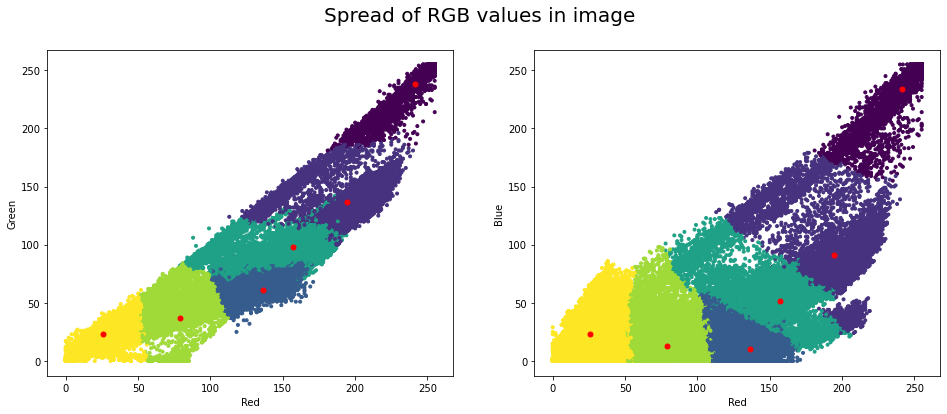

In [36]:
#2D plot of cluster data 
data = imageData
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(data[:,0], data[:,1], c=data[:,3], marker='.')
ax[0].scatter(centroids[:,0], centroids[:,1],s=100, c='r', marker='.')
ax[0].set(xlabel='Red', ylabel='Green')

ax[1].scatter(data[:,0], data[:,2], c=data[:,3], marker='.')
ax[1].scatter(centroids[:,0], centroids[:,2],s=100, c='r', marker='.')
ax[1].set(xlabel='Red', ylabel='Blue')

fig.suptitle('Spread of RGB values in image', size=20);

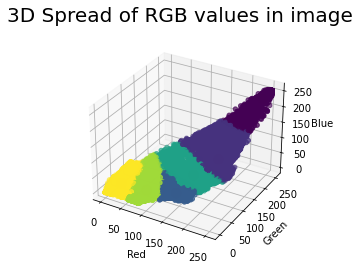

In [50]:
#NOTE: Change matplotlib inline to matplotlib notebook to change to 
###### interactive mode to spot centroids

%matplotlib inline
data = imageData
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c = data[:,3])
ax.scatter(centroids[:,0], centroids[:,1],centroids[:,2],s=100, c='r')


ax.set(xlabel='Red', ylabel='Green', zlabel='Blue')
fig.suptitle('3D Spread of RGB values in image', size=20);
plt.show()

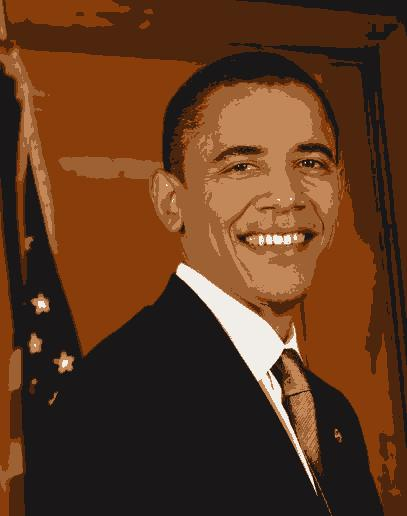

In [41]:
#Draw final picture
w, h = 407, 516
data = np.zeros((h, w, 3), dtype=np.uint8)
k=0
for i in range(516):
    for j in range(407):
        data[i,j] = centroids[int(imageData[k][3])]
        k+=1
        
img = Image.fromarray(data, 'RGB')
img.save('obamaKMEANS.jpg')
Im(filename='obamaKMEANS.jpg')

